In [ ]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.8.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.7.7.0.39

In [ ]:
import tensorflow_datasets as tfds #(Hazır veri setini rahatca indirmek adına: MNIST, IMDB, COCO, FASHION etc.)
from matplotlib import pyplot as plt #(Görsel veri inceleme, grafik çizme ve resim gösterme)

In [ ]:
ds=tfds.load("fashion_mnist", split="train") #(Fashion MNIST train datasını indirir ve bir TensorFlow dataset objesi döner.)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.8NIHTB_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.8NIHTB_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next()["image"] #(Bu satır TensorFlow Dataset dünyasından çıkıp Python dünyasına geçiş demek. Model eğitmek için tensor, analiz etmek için numpy kullanırız. İşte bu satır bunu sağlıyor.)

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [ ]:
import numpy as np #(Veriyi TensorFlow dışına çıkarmak ve kalsik Python dünyasında işlemek için Numpy şart.)

In [ ]:
dataiterator = ds.as_numpy_iterator() #(TensorFlow veri yapısını, Python’un anlayacağı NumPy formatına çevirir.)

In [ ]:
dataiterator.next() #(Dataset'in içinden gerçek bir örneği Python ortamına çeker.)

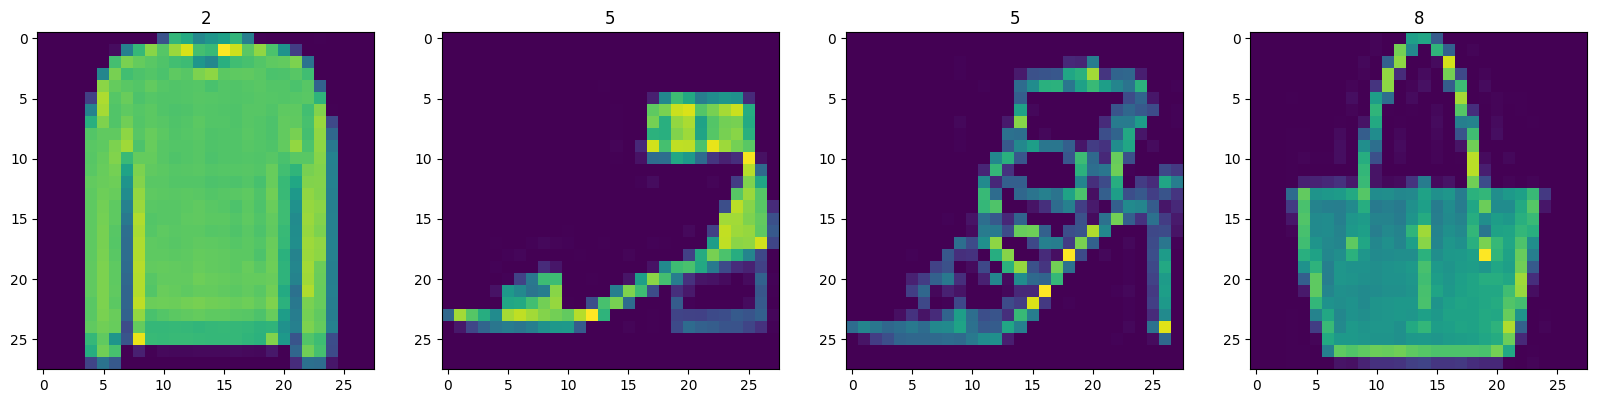

In [ ]:
fig, ax= plt.subplots(ncols=4, figsize=(20,20)) #(ncols= figür yatayda 4 tane subplot içerecek.) (figsize=figürün boyutunu 20x20 inç yapar)(ax=bir bir 4 tane ayırmak icin kullanılır) (modeli egitmeden once modele bakmak ıcın kullanrısın)
for idx in range(4): #(Döngü 4 defa calısır cünkü 4 resim gosterecegiz.)
  batch= dataiterator.next() #(TensorFlow datasetten tek bir veri çeker. Her dongude yenı bir resim ve label almak icin kullanılır)
  ax[idx].imshow(np.squeeze(batch["image"])) #(imshow=görseli subplota basar, siyah beyaz oldugundan gri tonlamalı gösterir)
  ax[idx].title.set_text(batch["label"]) #(subplotun baslıgına etiketi(label) yazar. 1 pantalon, 2 ayakkabı etc. Görselin hangı sınıfa aıt oldugunu görmek ıcın kullanılır)

In [ ]:
def scale_images(data): #(pythonda fonksıyon tanımlar. Amaci, resim verisini 0-255 aralıgından 0-1 aralıgına dönüştürmek)
  image=data["image"] #(dataimage= resim tensörünü çeker)
  return image / 255 #(resmi piksel bazında 255'e böler, daha hızlı egitim daha stabil optimizasyon için. Vanishing gradient riskini azaltır.)

In [ ]:
ds=tfds.load("fashion_mnist", split="train") #(TensorFlow Datasets (TFDS) kütüphanesinden Fashion MNIST verisini indirir)
ds=ds.map(scale_images) #(dataset üzerindeki her örneği scale_images fonksiyonuna sokar)
ds=ds.cache() #(veri pipeline'ı hızlandırır. Cok daha hızlı egitim)
ds=ds.shuffle(60000) #(dataseti rastgele karıstır)(overfittingi azaltmak icin shuffle yaparız)
ds=ds.batch(128) #(mini sample training icin data seti parcalar artık tek tek ornek yerıne daha katmanlı orneklem yapar. batch kullanmazsan gradient hesapları yavaslar)
ds=ds.prefetch(64) #(tensorflow pipelinea paralelligi kazandırır. model train sırasında GPU bir samplei işlerken CPU sonraki sample(batch)i hazırlar. Bu performance boost saglar)


In [ ]:
ds.as_numpy_iterator().next().shape #(Datasetten bir sample çekip onun boyutunu verir. eğer batch size 128 ise shape (128,28,28,1) olur)

(128, 28, 28, 1)